# Lecture 11: The Expectation and Variance of Random Variables
***

We'll need Numpy and Matplotlib for this notebook, so let's load them. 

In [2]:
import numpy as np 
import matplotlib.pylab as plt 
%matplotlib inline

### Exercise 1 - Easy Peasy Plinko 
*** 

[Plinko](http://priceisright.wikia.com/wiki/Plinko), the shining jewel of the gameshow [Price is Right](https://en.wikipedia.org/wiki/The_Price_Is_Right), is a staple of American culture.  Luckily for us, it's also chalk-full of interesting ideas from probability and statistics. The game involves dropping a disc onto an inclined board of pegs and letting it bounce around until it lands in a bin with an associated cash value. Players get to drop some number of discs down the Plinko board and keep their winnings.   

In this exercise, we'll look at a simplified version of Plinko, with the following layout: 

![alt text](https://www.cs.colorado.edu/~ketelsen/files/courses/csci3022/figs/plinko_small.png)

Note that in this simplified version of Plinko there are $6$ rows of pegs and $7$ bins with monetary values $\$0 - \$6$.  Finally, the player is required to drop the disc directly onto the single peg in the top-most row. 

**Part A**: Write a function plinko_trial that takes as arguments the number of rows of pegs $n$, and the probability $p$ that a disc falls to the _right_ when it hits a peg, and returns the value of the bin that it lands in. 

**Solution**: 

In [68]:
def plinko_trial(num_rows=6, p=0.5):
    bucket = 0 
    for ii in range(num_rows):
        bucket += np.random.choice([0,1], p=[1-p, p])
    return bucket

**Part B**: Write a function plinko_sim that takes as arguments the number of rows of pegs $n$, and the probability $p$ that a disc falls to the _right_ when it hits a peg, and the number of Plinko trials to simulate, and returns an estimate of the expected value of the winnings from a single round of Plinko.  Run your simulation with $p=0.5$ and observe the results.  Can you make a hypothesis about the expected value of random variable describing the winnings? 

**Solution**: 

In [69]:
def plinko_sim(num_rows=6, p=0.5, num_trials=int(1e3), verbose=True):
    winnings = np.array([plinko_trial(num_rows, p) for ii in range(num_trials)])
    mean_winnings = np.mean(winnings)
    var_winnings  = np.var(winnings)
    print("E[Winnings] = {:.3f}, Var[Winnings] = {:.3f}".format(mean_winnings, var_winnings))

plinko_sim(num_rows=6, p=0.5, num_trials=int(1e3), verbose=True)

E[Winnings] = 3.057, Var[Winnings] = 1.576


**Part C**: The following function, plinko_plot, uses the plinko_trial function you wrote in **Part A** and plots running estimates of the expected winnings for Plinko boards with various numbers of rows.  Execute the function with $n=6, ~100,$ and $500$ and comment on any observations that you make. 

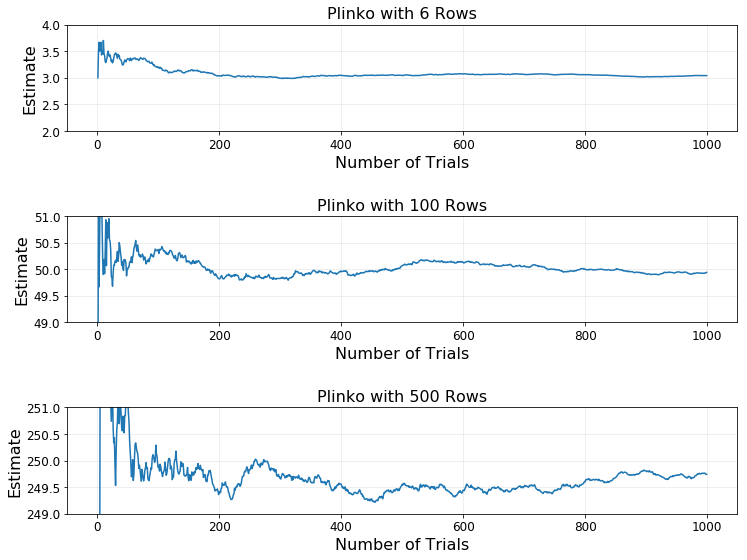

In [65]:
def plinko_plot(num_rows=[6], p=0.5, num_trials=int(1e3), reveal=False):
    
    np.random.seed(1234)
    
    fig, axes = plt.subplots(nrows=len(num_rows), ncols=1, figsize=(12,3*len(num_rows)))
    
    for ii, n in enumerate(num_rows):
        winnings = np.array([plinko_trial(n, p) for kk in range(num_trials)])
        estimates = np.array([np.mean(winnings[:ii]) for ii in range(1,num_trials)])
        if not reveal: 
            axes[ii].plot(range(1,num_trials), estimates)
        else:
            vstr = "{:.1f}".format(.25*n)
            axes[ii].plot(range(1,num_trials), estimates, label=r"Var(X) = "+vstr)
        axes[ii].grid(True, alpha=0.25)
        mu = n*p
        axes[ii].set_xlabel("Number of Trials", fontsize=16)
        axes[ii].set_ylabel("Estimate", fontsize=16)
        axes[ii].set_title("Plinko with {} Rows".format(n), fontsize=16)
        axes[ii].set_ylim([mu-1, mu+1])
        plt.sca(axes[ii])
        plt.yticks(np.linspace(mu-1,mu+1,5), fontsize=12)
        plt.xticks(np.linspace(0,num_trials,6), fontsize=12)
        if reveal:
            axes[ii].legend(loc = "upper right")
        
    fig.subplots_adjust(hspace=0.8)
        
plinko_plot([6,100,500], num_trials=int(1e3))

**Part D**: Suppose you were the devious owner of a 10-row Easy Peasy Plinko game and you wanted to make some money off of some unsuspecting carnival goers.  For a given value of $p$ (which you can set by subtly adjusting the placement of pegs) how much should you charge someone to play your game so that you pocket, on average, $\$1$ per game played? 

**Solution**: Let $X$ be the random variable describing the winnings of a game of Plinko.  The expected winnings for a 10-row Plinko game with right-probability $p$ is $E[X] = 10p$.  You want to charge a fee $C$ to play your game.  Then the random variable describing the payout of the game is defined by $Y = X - C$.  We want to choose $C$ such that $E[Y] = -1$.  We have  

$$
-1 = E[Y] = E[X - C] = E[X] - C = 10p - C \Rightarrow C = 10p + 1 
$$

Thus for a game where $p = 0.5$ you would charge the player $\$6$ to play.  

Probably a better strategy would be to rig your board so that $p = 0.4$ so that you could charge the player $\$5$ (the seemingly-obvious average payout) and still make, on average, $\$1$ per game. 


<br>

### Exercise 2
*** 

The probability distribution of a discrete random variable $X$ is given by 

$$
P(X = -1) = \frac{1}{5}, \quad P(X = 0) = \frac{2}{5}, \quad P(X = 1) = \frac{2}{5}
$$

**Part A**: Compute $E[X]$


**Solution**: We have 

$$
E[X] = -1\cdot\frac{1}{5} + 0\cdot\frac{2}{5} + 1\cdot\frac{2}{5} = \frac{1}{5}
$$

**Part B**: Give the probability distribution of the random variable $Y = X^2$ and compute $E[Y]$ using the distribution of $Y$. 

**Solution**:  Note that when $X = 0$ we have $Y = X^2 = 0$. Similarly, when $X = -1$ or $1$ we have $Y = X^2 = 1$. Taking the probabilities associated with $X =-1$ and $X = 1$ and lumping them together with $Y = 1$, we have   


$$
P(Y = 0) = \frac{2}{5}, \quad P(Y = 1) = \frac{3}{5}
$$

Then 

$$
E[Y] = 0\cdot\frac{2}{5} + 1\cdot\frac{3}{5} = \frac{3}{5}
$$

**Part C**: Determine $E[X^2]$ using the change-of-variables formula. Check your answer against the one from **Part B**. 

**Solution**: We have 

$$
E[X^2] = (-1)^2\cdot\frac{1}{5} + 0^2\cdot \frac{2}{5} + 1^2\frac{2}{5} = \frac{1}{5} + 0 + \frac{2}{5} = \frac{3}{5}
$$

which agrees with the computation we did in **Part B**. 

**Part D**: Determine $Var(X)$. 

**Solution**: We have 

$$
Var(X) = E[X^2] - (E[X])^2  = \frac{3}{5} - \left(\frac{1}{5}\right)^2 = \frac{3}{5} - \frac{1}{25} = \frac{15}{25} - \frac{1}{25} = \frac{14}{25}
$$

### Exercise 3  
*** 

For a certain random variable $X$ it is known that $E[X] = 4$ and $Var(X) = 2$ 

**Part A**: Compute $E[X^2]$


**Solution**: We know that $Var(X) = E[X^2] - (E[X])^2$.  Solving for $E[X^2]$ gives 

$$
E[X^2] = Var(X) + (E[X])^2 = 2 + 16 = 18
$$

**Part D**: Determine the expectation and variance for the random variable $Y = 1 - 2X$. 

**Solution**: The expectation is fairly simple, we have 

$$
E[Y] = E[1-2X] = 1 - 2E[X] = 1 - 2\cdot4 = -7 
$$

To compute $Var(Y)$ we need to know $E[Y^2]$.  We have 

$$
E[Y^2] = E[(1-2X)^2] = E[1 -4X + 4X^2] = 1 - 4E[X] + 4E[X^2] = 1-4\cdot4+4\cdot 18 =57 
$$

We then have 

$$
Var(Y) = E[Y^2] - (E[Y])^2 = 57 - (-7)^2 = 57-49 = 8
$$

**Part C**: Can you think of a discrete random variable that satisfies $E[X] = 4$ and $Var(X) = 2$? 

**Solution**: Yep!  A Binomial random variable $X$ with $n=8$ and $p = \frac{1}{2}$

**Part D**: Create a series of simple simulations that verify the computations you did in **Parts A-C**. 

In [90]:
def check_values(num_samples=int(1e3)):
    
    # Random samples from Bin(8, 0.5)
    x = np.random.binomial(8,.5,size=num_samples)
    print("Part A: E[X] \u2248 {:.2f}, Var(X) \u2248 {:.2f}".format(np.mean(x), np.var(x)))
    print("")
    
    # Check X^2
    print("Part B: E[X^2] \u2248 {:.2f}".format(np.mean(x*x)))
    print("")
    
    # Random samples from Y 
    y = 1 - 2*x 
    print("Part C: E[Y] \u2248 {:.2f}, Var(Y) \u2248 {:.2f}".format(np.mean(1-2*x), np.var(1-2*x)))

check_values(num_samples=int(1e5))

Part A: E[X] ≈ 4.00, Var(X) ≈ 2.00

Part B: E[X^2] ≈ 17.96

Part C: E[Y] ≈ -6.99, Var(Y) ≈ 7.99


Looks pretty dead on! 

### Exercise 4  
*** 

Let $X$ be a continuous random variable with probability density function given by 

$$
f(x) = \left\{ 
\begin{array}{rl}
\dfrac{x}{2} & 0 \leq x \leq 2 \\
0 & \textrm{otherwise}
\end{array}
\right.
$$

**Part A**: Compute $E[X]$. Before you do the computation, will the expected value lie closer to 0 than 2, or the other way around? 


**Solution**: Because the density function increases linearly from 0 to 2, we expect the expected value to lie closer to $2$ than to $0$.  Let's check 

$$
E[X] = \int_{-\infty}^\infty x~f(x)~dx = 
\int_0^2 x\cdot\frac{x}{2}dx = 
\int_0^2 \frac{x^2}{2}~dx = 
\left. \frac{x^3}{6} \right|_{~0}^{~2} = \frac{4}{3}
$$


**Part B**: Compute $Var(X)$. 

**Solution**: We have 

$$
Var(X) = E[(X-E[X])^2] = 
\int_{-\infty}^\infty \left(x - \frac{4}{3} \right)^2 \cdot f(x) ~ dx =
\int_{0}^2 \left(x - \frac{4}{3} \right)^2 \cdot \frac{x}{2} ~ dx =
\int_{0}^2\left(x^2 - \frac{8}{3}x + \frac{16}{9} \right) \cdot \frac{x}{2} ~ dx =
$$

$$
\int_{0}^2\left(\frac{1}{2}x^3 - \frac{4}{3}x^2 + \frac{8}{9}x \right) ~ dx =
\left. \frac{1}{8}x^4 - \frac{4}{9}x^3 + \frac{4}{9}x^2 ~\right|_{~0}^{~2} = 
2 - \frac{32}{9} + \frac{16}{9} = \frac{18}{9}-\frac{32}{9}+\frac{16}{9} = \frac{2}{9}
$$

**Part C**: Use your results from **Part A** to compute the expectation and variance of the random variable $Y = 2X + 3$. 

**Solution**: We have 

$$
E[Y] = E[2X + 3] = 2E[X] + 3 = 2\frac{4}{3}+3 = \frac{8}{3} + \frac{9}{3} = \frac{17}{3}
$$

$$
Var(Y) = Var(2X + 3) = Var(2X) = 2^2Var(X) = 4Var(X) = 4\cdot\frac{2}{9} = \frac{8}{9}
$$